In [7]:
from tensorflow.keras.models import load_model

loaded_model = load_model('ocean.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


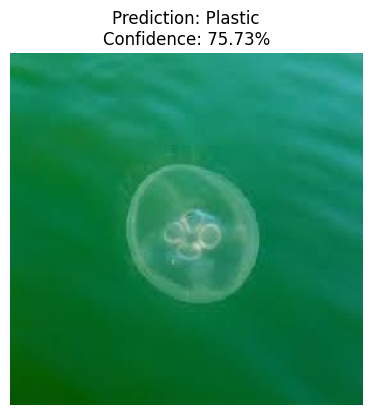

('Plastic', 75.73468089103699)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_plastic(image_path, loaded_model):
    # Load and preprocess image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    display_img = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Predict
    prediction = loaded_model.predict(img_array)
    classes = ['Non-Plastic', 'Plastic']
    result = classes[np.argmax(prediction)]
    confidence = prediction[0][np.argmax(prediction)] * 100
    
    # Display image and prediction
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(display_img)
    plt.title(f'Prediction: {result}\nConfidence: {confidence:.2f}%')
    plt.axis('off')
    plt.show()
    
    return result, confidence


# Predict
image_path = 'test1.jpeg'
predict_plastic(image_path, loaded_model)